# Trabalho IA Ética - Primeira Atividade

## Importando os Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
import os
os.chdir('C:\\Users\\decmg\\OneDrive\\Documentos\\Material Disciplinas\\MO436-IA Ética\\Atividade 1')

In [3]:
os.listdir('data')

['adult.data', 'adult.names', 'adult.test', 'Index', 'old.adult.names']

In [4]:
# Abrir e ler o arquivo adult.names
with open('data/adult.names', 'r') as file:
    names_content = file.read()

print(names_content)

## Aqui tem informações importantes sobre a fonte dos dados e o estudo realizado

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [5]:
# Tive que setar o nome das colunas porque o dataset principal não carrega o nome das colunas
column_names = ['age', 
                'workclass', 
                'fnlwgt', 
                'education', 
                'education_num', 
                'marital_status', 
                'occupation', 
                'relationship', 
                'race', 
                'sex', 
                'capital_gain', 
                'capital_loss', 
                'hours_per_week', 
                'native_country', 
                'income']

In [6]:
data_adult = pd.read_csv('data/adult.data', header=None, names=column_names)
data_adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data_adult_test =  pd.read_csv('data/adult.test', names=column_names,skiprows=1)
data_adult_test.head()
# Aqui ele já separou o dataset de teste em um arquivo separado 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
#Shape
num_linhas, num_colunas = data_adult.shape
num_linhas,num_colunas

(32561, 15)

In [9]:
num_linhas_test,num_colunas_test =data_adult_test.shape
print(num_linhas_test,num_colunas_test)

16281 15


In [10]:
print(r'Proporção de Dados de Treino: ',num_linhas/(num_linhas + num_linhas_test),'.' , 'Proporção de Dados de Teste: ',num_linhas_test/(num_linhas + num_linhas_test))

Proporção de Dados de Treino:  0.6666598419393145 . Proporção de Dados de Teste:  0.33334015806068545


## Pré-Processamento

In [11]:
pd.isnull(data_adult).sum().sum(), pd.isnull(data_adult_test).sum().sum()
# Não há presenah de missing values

(0, 0)

In [12]:
# Função para identificar se a variável é categórica ou numérica
def analisar_variavel(df):
    for column in df.columns:
        print(f"\nAnalisando a variável: {column}")
        
        if pd.api.types.is_numeric_dtype(df[column]):
            # Se for numérica, mostrar a distribuição 
            print("Distribuição Numérica:")
            plt.figure(figsize=(8, 4))
    
            color = np.random.rand(3,)
            
            df[column].hist(bins=20, color=color)
            plt.title(f'Distribuição da variável {column}')
            plt.xlabel(column)
            plt.ylabel('Frequência')
            plt.show()
        else:
            # Se for categórica, mostrar value_counts
            print("Contagem de Valores Categóricos:")
            print(df[column].value_counts())


Analisando a variável: age
Distribuição Numérica:


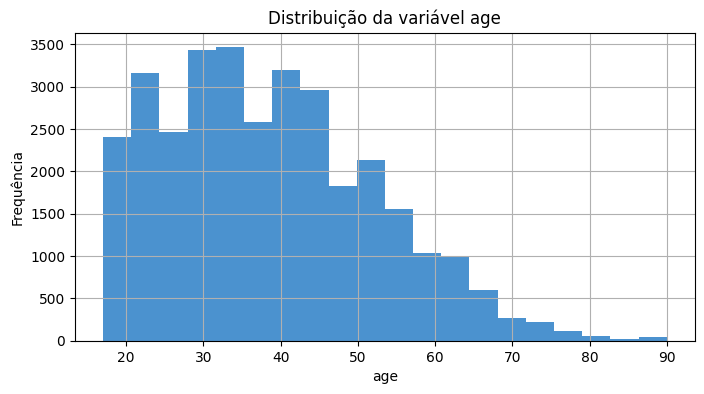


Analisando a variável: workclass
Contagem de Valores Categóricos:
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

Analisando a variável: fnlwgt
Distribuição Numérica:


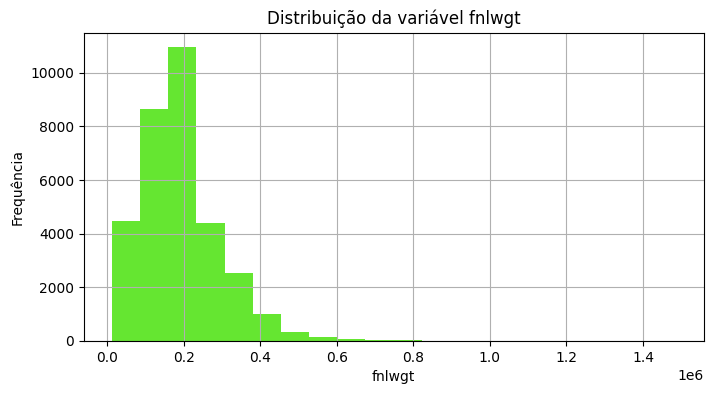


Analisando a variável: education
Contagem de Valores Categóricos:
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

Analisando a variável: education_num
Distribuição Numérica:


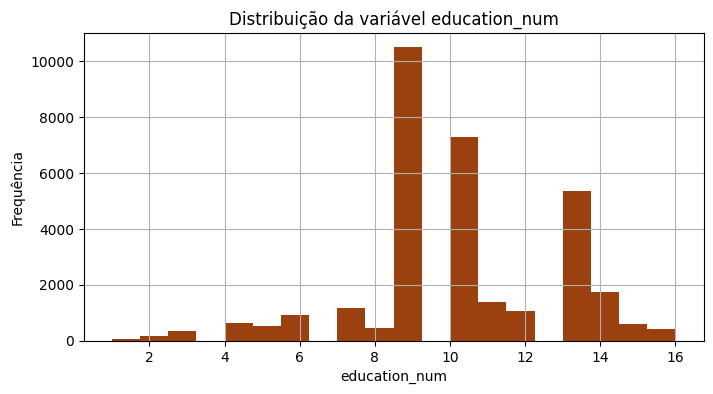


Analisando a variável: marital_status
Contagem de Valores Categóricos:
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

Analisando a variável: occupation
Contagem de Valores Categóricos:
occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

Analisando a variável: relationship
Contagem de Valores Categóricos:
relationship
 Husband           13193
 Not-in-family      8305
 Own-child          

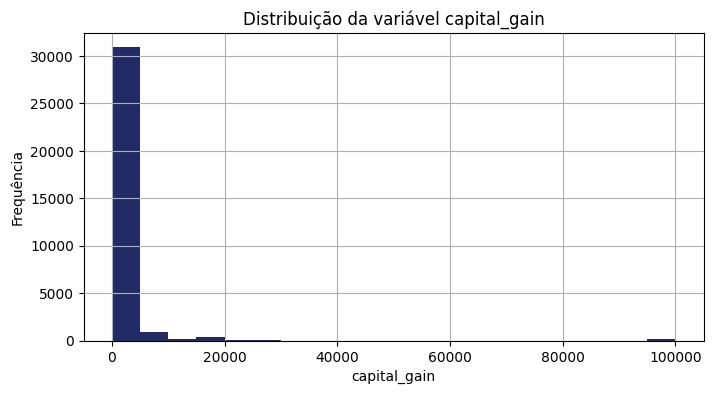


Analisando a variável: capital_loss
Distribuição Numérica:


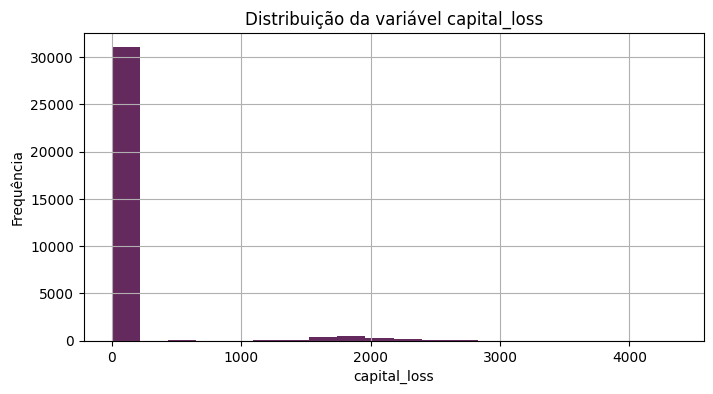


Analisando a variável: hours_per_week
Distribuição Numérica:


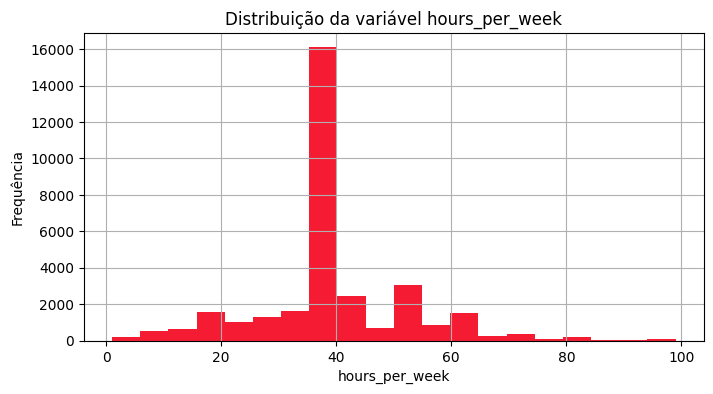


Analisando a variável: native_country
Contagem de Valores Categóricos:
native_country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                

In [13]:
analisar_variavel(data_adult)


#Num primeiro Overview

# age: distribuição assimétrica a direita
# Workclass

In [14]:
# Verificar se uma coluna é do tipo 'object' e se contém '?'
for col in data_adult.columns:
    # Verifica se a coluna é categórica
    if data_adult[col].dtype == 'object': 
        # Conta o número de amostras que contém '?' na coluna
        count = data_adult[col].str.contains('\?').sum()
        print(f"Há {count} amostras na coluna '{col}' com '?'")
 # Há amostras que possuem o caractere '?', Vou fazer algo para excluir

Há 1836 amostras na coluna 'workclass' com '?'
Há 0 amostras na coluna 'education' com '?'
Há 0 amostras na coluna 'marital_status' com '?'
Há 1843 amostras na coluna 'occupation' com '?'
Há 0 amostras na coluna 'relationship' com '?'
Há 0 amostras na coluna 'race' com '?'
Há 0 amostras na coluna 'sex' com '?'
Há 583 amostras na coluna 'native_country' com '?'
Há 0 amostras na coluna 'income' com '?'


In [15]:
def remover_amostras_com_interrogacao(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(f"Verificando a coluna: {column}")
            
    
            contem_interrogacao = df[column].astype(str).str.contains('\?')
            
            if contem_interrogacao.any():
                num_amostras = contem_interrogacao.sum()
            
                print(f"Removendo {num_amostras} amostras da coluna {column} com '?'")

                df = df[~contem_interrogacao]
            else:
                print(f"Nenhum '?' encontrado na coluna {column}")
    
    return df

In [16]:
data_adult = remover_amostras_com_interrogacao(data_adult)

Verificando a coluna: workclass
Removendo 1836 amostras da coluna workclass com '?'
Verificando a coluna: education
Nenhum '?' encontrado na coluna education
Verificando a coluna: marital_status
Nenhum '?' encontrado na coluna marital_status
Verificando a coluna: occupation
Removendo 7 amostras da coluna occupation com '?'
Verificando a coluna: relationship
Nenhum '?' encontrado na coluna relationship
Verificando a coluna: race
Nenhum '?' encontrado na coluna race
Verificando a coluna: sex
Nenhum '?' encontrado na coluna sex
Verificando a coluna: native_country
Removendo 556 amostras da coluna native_country com '?'
Verificando a coluna: income
Nenhum '?' encontrado na coluna income


In [17]:
data_adult # Excluidas as colunas categóricas cujos valores possuiam '?'

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Separando os dados de treino entre Treino e Validação - O teste já possui dataset separado

In [18]:
# Aqui tive que eliminar 'espaços' que atrapalharam na hora e converter para binário
data_adult['income'] = data_adult['income'].str.strip()
data_adult.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 30162, dtype: object

In [19]:
data_adult['income'] = data_adult['income'].map({'<=50K':1,'>50K':0})
data_adult.income.value_counts()

income
1    22654
0     7508
Name: count, dtype: int64

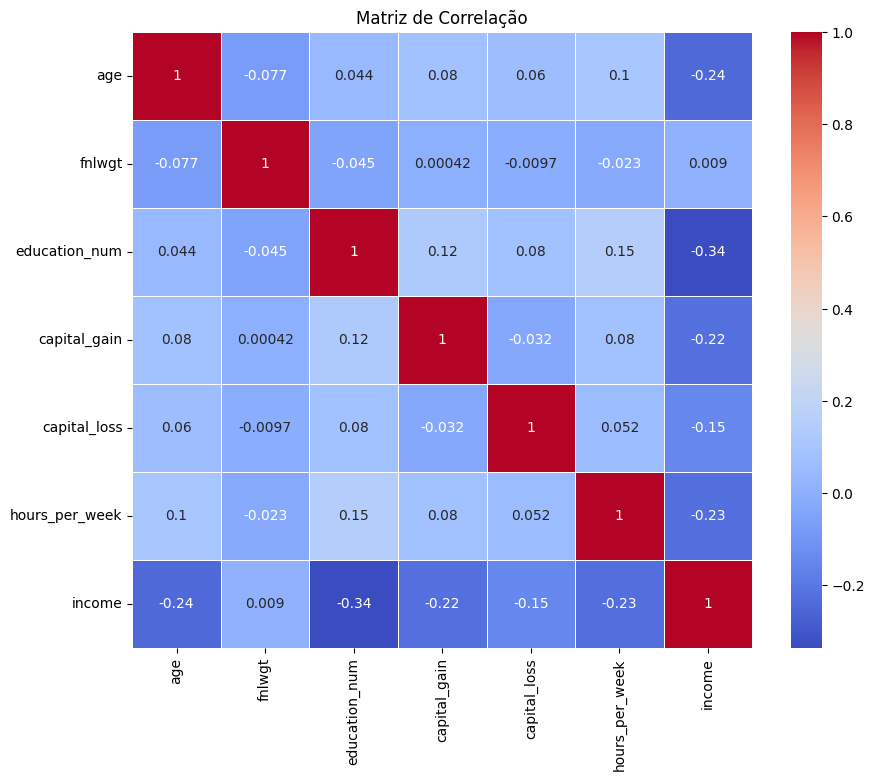

In [20]:
import seaborn as sns

# Plotar a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))

sns.heatmap(data_adult.loc[:,data_adult.dtypes == 'int64'].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show() # Nao foi detectado nenhum vazamento com o target (income) e nenhuma variavel preditora com multicolinearidade

In [21]:
X_train, X_val, y_train, y_val = train_test_split(data_adult.drop(['income'],axis=1),data_adult.income, test_size=0.2, random_state=42)
X_train.shape,y_train.shape , X_val.shape,y_val.shape

((24129, 14), (24129,), (6033, 14), (6033,))

## Tratamento dos Dados

### Modificando Variáveis

In [22]:
numerical_cols = ['age','fnlwgt','education_num','hours_per_week','capital_gain','capital_loss','hours_per_week']
categorical_cols = ['workclass', 'education','marital_status','occupation','relationship','race','sex','native_country']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())]), numerical_cols),  # Normalização
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-Hot Encoding
    ]
)

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier())
# ])

# # Ajustando o pipeline no conjunto de treino
# pipeline.fit(X_train, y_train)